In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score,roc_curve,auc
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [3]:
df = pd.read_csv("car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# EDA

In [4]:
df.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [5]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


## Rename column names

In [6]:
col_names = ['buying', 'maintain', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [7]:
df.head()

,buying,maintain,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


#### View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maintain  1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
col_names = ['buying', 'maintain', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maintain
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [13]:
# check missing values in variables
df.isna().sum()

buying      0
maintain    0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Declare feature and target variable

In [14]:
X = df.drop(['class'],axis=1)
y = df['class']

In [16]:
# now encoding variables with ordinal encoding
import category_encoders as ce

encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded,columns = encoder.get_feature_names_out(X.columns))

In [17]:
# label encoding
lab = LabelEncoder()
y = lab.fit_transform(y)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.33,random_state=42)

In [19]:
X_train.shape , X_test.shape

((1157, 6), (570, 6))

In [20]:
y_train

array([2, 2, 2, ..., 2, 2, 0])

# KNN Classification

In [21]:

# Implementing KNN model
for k in range(3, 11, 2):
    # print("k = ", k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    threshold = 0.5

    train_prob = model.predict_proba(X_train)[:, 1]
    y_train_pred = (train_prob >= threshold).astype(int)

    test_prob = model.predict_proba(X_test)[:, 1]
    y_test_pred = (test_prob >= threshold).astype(int)

    print(f"Accuracy for k={k}: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
    print(f'Precision score for k={k}: {precision_score(y_test, y_test_pred, average="macro"):.3f}')  # Changed to 'macro'
    print(f'Recall score for k={k}: {recall_score(y_test, y_test_pred, average="macro"):.3f}')  # Changed to 'macro'
    print(f"F1 Score for k={k}: {f1_score(y_test, y_test_pred, average='macro'):.3f}")  # Changed to 'macro'
    print(f'Confusion matrix for k={k}:\n {confusion_matrix(y_test, y_test_pred)}')

Accuracy for k=3: 23.33%
Precision score for k=3: 0.231
Recall score for k=3: 0.345
F1 Score for k=3: 0.217
Confusion matrix for k=3:
 [[126   1   0   0]
 [ 11   7   0   0]
 [399   0   0   0]
 [ 24   2   0   0]]
Accuracy for k=5: 23.16%
Precision score for k=5: 0.270
Recall score for k=5: 0.331
F1 Score for k=5: 0.211
Confusion matrix for k=5:
 [[126   1   0   0]
 [ 12   6   0   0]
 [399   0   0   0]
 [ 26   0   0   0]]
Accuracy for k=7: 22.98%
Precision score for k=7: 0.212
Recall score for k=7: 0.317
F1 Score for k=7: 0.188
Confusion matrix for k=7:
 [[126   1   0   0]
 [ 13   5   0   0]
 [399   0   0   0]
 [ 24   2   0   0]]
Accuracy for k=9: 22.63%
Precision score for k=9: 0.306
Recall score for k=9: 0.278
F1 Score for k=9: 0.141
Confusion matrix for k=9:
 [[127   0   0   0]
 [ 16   2   0   0]
 [399   0   0   0]
 [ 26   0   0   0]]


C:\Users\Veer\anaconda3\envs\DMP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Veer\anaconda3\envs\DMP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Veer\anaconda3\envs\DMP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Veer\an

Confusion Matrix:
 [[127   0   0   0]
 [ 16   2   0   0]
 [399   0   0   0]
 [ 26   0   0   0]]


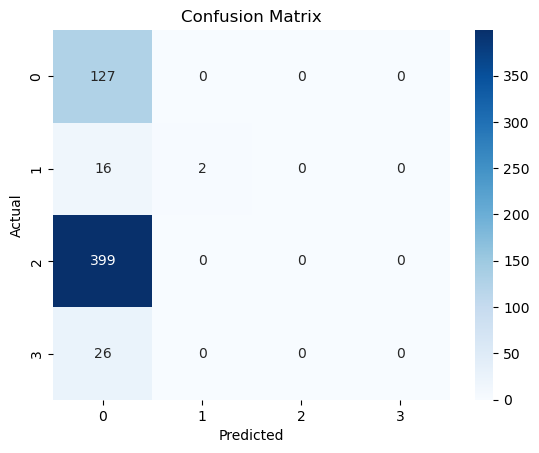

In [22]:

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3,5,7,9,11,13,15]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'n_neighbors': 7}


# Decision Tree

### Decision Tree Classifier with criterion gini index

In [24]:
model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [25]:
y_pred_gini = model.predict(X_test)

### Check accuracy score with criterion gini index

In [26]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with gini : {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with gini : 0.8053


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set

## Compare the train-set and test-set accuracy

In [27]:
y_pred_train_gini = model.predict(X_train)
y_pred_train_gini

array([2, 2, 2, ..., 2, 2, 0])

In [28]:
print('Training set accuracy score :{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))
      

Training set accuracy score :0.7848


### Check for overfitting and underfitting

In [29]:
#print scores of train and test dataset
print('Train set accurancy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))
print('Test set accurancy score:{0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Train set accurancy score:0.7848
Test set accurancy score:0.8053


## Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.
## These two values are quite comparable. So, there is no sign of overfitting.

# Visualize decision-trees

[Text(0.6, 0.875, 'x[5] <= 2.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.4, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.4, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.7, 0.75, '  False')]

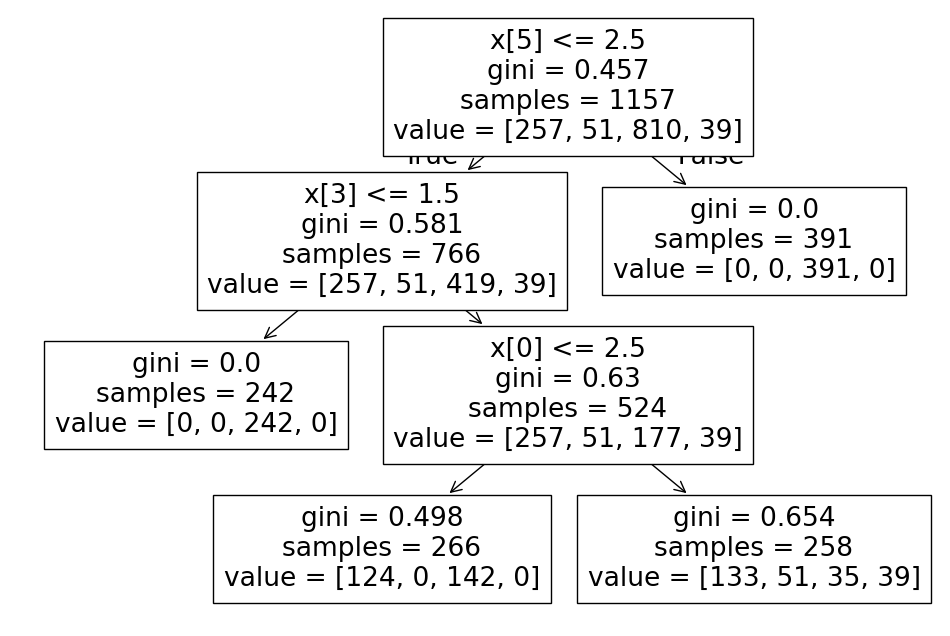

In [30]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(model.fit(X_train,y_train))

## Decision Tree Classifier with criterion entropy

In [31]:
model1 = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [32]:
y_pred_ent = model1.predict(X_test)

### Check accuracy score with criterion entropy

In [33]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_ent)))

Model accuracy score with criterion entropy: 0.8053


### Comapre b/w train and test set accuracy

In [34]:
y_pred_train_ent = model1.predict(X_train)

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_ent)))

Training-set accuracy score: 0.7848


### Check for overfitting and underfitting

In [36]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model1.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model1.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

[Text(0.6, 0.875, 'x[5] <= 2.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.4, 0.625, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6, 0.375, 'x[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.4, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.7, 0.75, '  False')]

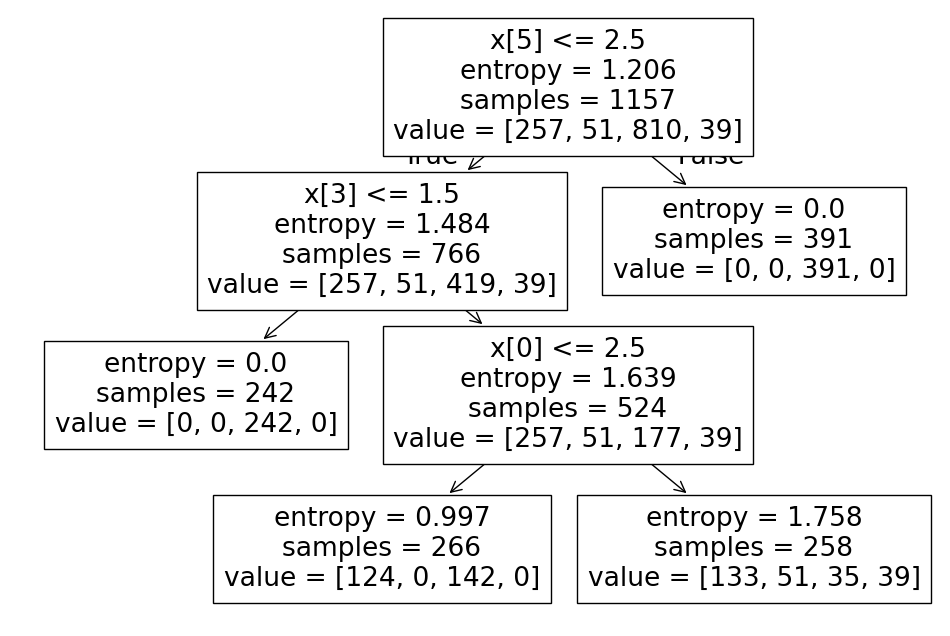

In [37]:
plt.figure(figsize=(12,8))
tree.plot_tree(model1.fit(X_train,y_train))

# Confusion Matrix

In [38]:
cm = confusion_matrix(y_test,y_pred_ent)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [39]:
print(classification_report(y_test,y_pred_ent))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       127
           1       0.00      0.00      0.00        18
           2       0.87      0.97      0.92       399
           3       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



C:\Users\Veer\anaconda3\envs\DMP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Veer\anaconda3\envs\DMP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Veer\anaconda3\envs\DMP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Logistic Regression

In [42]:
x = X_encoded[['maintain']]
y = y

In [43]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [44]:
df['proba'] = model.predict_proba(x)[:,1]

In [45]:
df_Roc = []

In [46]:
for threshold in np.arange(0,1.1,0.1):
    y_pred = (df['proba']>=threshold).astype('int')
    cm = confusion_matrix(y,y_pred)
    TP = cm[1, 1] 
    TN = cm[0, 0]
    FP = cm[0, 1] 
    FN = cm[1, 0] 
    
    # Calculate TPR and FPR
    TPR = TP / (TP + FN) 
    FPR = FP / (FP + TN) 
    df_Roc.append({'Threshold' : threshold , 'TP':TP,'TN':TN,'FP':FP,'FN':FN,'TPR':TPR,'FPR':FPR})
df3_Roc = pd.DataFrame( df_Roc)
print(df3_Roc)

    Threshold  TP   TN   FP  FN       TPR       FPR
0         0.0  69    0  384   0  1.000000  1.000000
1         0.1  46  292   92  23  0.666667  0.239583
2         0.2   0  384    0  69  0.000000  0.000000
3         0.3   0  384    0  69  0.000000  0.000000
4         0.4   0  384    0  69  0.000000  0.000000
5         0.5   0  384    0  69  0.000000  0.000000
6         0.6   0  384    0  69  0.000000  0.000000
7         0.7   0  384    0  69  0.000000  0.000000
8         0.8   0  384    0  69  0.000000  0.000000
9         0.9   0  384    0  69  0.000000  0.000000
10        1.0   0  384    0  69  0.000000  0.000000


In [50]:
def evaluate_classifiers(X_train, X_test, y_train, y_test):
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=5),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
        "Decision Tree": DecisionTreeClassifier(random_state=42)
    }

    results = []

    # Evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        precision_test = precision_score(y_test, y_pred_test, average='macro')
        precision_train = precision_score(y_train, y_pred_train, average='macro')
        recall_test = recall_score(y_test, y_pred_test, average='macro')
        recall_train = recall_score(y_train, y_pred_train, average='macro')
        
        results.append({"Model": name, "Train Accuracy": accuracy_train, 'Test Accuracy': accuracy_test, 
                        "Train Precision": precision_train, 'Test Precision': precision_test, "Train Recall": recall_train,
                       'Test Recall': accuracy_test})

    return print(pd.DataFrame(results))

In [51]:
evaluate_classifiers(X_train, X_test, y_train, y_test)

                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression        0.700086       0.689474         0.282247   
1  K-Nearest Neighbors        0.957649       0.926316         0.945178   
2        Decision Tree        1.000000       0.971930         1.000000   

   Test Precision  Train Recall  Test Recall  
0        0.259615      0.265939     0.689474  
1        0.837827      0.828519     0.926316  
2        0.895748      1.000000     0.971930  


C:\Users\Veer\anaconda3\envs\DMP\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Veer\anaconda3\envs\DMP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Veer\anaconda3\envs\DMP\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being

# K-Nearest Neighbors (KNN):
#### Train Accuracy: 95.76%, Test Accuracy: 92.63%
#### The KNN model performs very well on both the training and test sets. The slight drop in accuracy on the test set shows that it's not overfitting much, indicating good generalization.
#### Train Precision: 94.52%, Test Precision: 83.78%
#### Precision is quite high, meaning most predicted positives are actual positives. It still slightly drops in the test set, but overall, KNN does a good job of minimizing false positives.
#### Train Recall: 82.85%, Test Recall: 92.63%
#### Recall is high, especially on the test set, meaning the KNN model is effectively identifying true positives.

# Decision Tree:
#### Train Accuracy: 100%, Test Accuracy: 97.19%
#### The decision tree perfectly fits the training data (100% accuracy), which could indicate overfitting. However, the high test accuracy (97.19%) suggests that overfitting is not a major concern in this case.
#### Train Precision: 100%, Test Precision: 89.57%
#### On the test set, the precision is slightly lower, but still quite high. This means the decision tree has a very high success rate in predicting the positive class.
#### Train Recall: 100%, Test Recall: 97.19%
#### The recall is perfect in training and nearly perfect in testing, indicating that the model can very accurately identify positives.

# Logistic Regression:
#### Train Accuracy: 70.01%, Test Accuracy: 68.95%
#### The model performs almost equally well on both training and test data, indicating no overfitting. However, the accuracy is relatively low, meaning the model may struggle to generalize or find clear boundaries in the data.
#### Train Precision: 28.22%, Test Precision: 25.96%
#### Precision is low, which suggests that a high proportion of predicted positives are actually false positives. The model is not confident in predicting the positive class (Loan Approval = 1).
#### Train Recall: 26.59%, Test Recall: 68.95%
#### Recall is higher on the test set than on the training set, which means the model correctly identifies most actual positives in the test set, but it might have trouble doing so consistently during training.

### Based on these metrics, KNN and Decision Tree both seem to perform well, with Decision Tree having slightly better overall performance, the KNN model may generalize a bit better with fewer signs of overfitting.